In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [226]:
pd.read_excel("data/clean_pisos.xlsx")

,Precio,UF,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Uf_log,Comuna
0,99245550,2850,49,2,1,0,19/12/2022,7.955425,San Miguel
1,75000000,2153,62,3,2,0,19/12/2022,7.675082,Estación Central
2,68949540,1980,39,2,1,0,19/12/2022,7.591357,Independencia
3,70342460,2020,46,2,1,0,19/12/2022,7.611348,San Joaquín
4,971561700,27900,340,4,3,3,19/12/2022,10.236418,Las Condes
...,...,...,...,...,...,...,...,...,...
9222,69646000,2000,70,1,1,0,04/12/2022,7.601402,Independencia
9223,390017600,11200,147,4,3,3,04/12/2022,9.323758,Las Condes
9224,73128300,2100,33,1,1,0,04/12/2022,7.650169,Santiago
9225,80000000,2297,65,3,2,1,04/12/2022,7.739794,Pudahuel


In [227]:
piso=pd.read_excel("data/clean_pisos.xlsx")

In [228]:
piso

,Precio,UF,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Uf_log,Comuna
0,99245550,2850,49,2,1,0,19/12/2022,7.955425,San Miguel
1,75000000,2153,62,3,2,0,19/12/2022,7.675082,Estación Central
2,68949540,1980,39,2,1,0,19/12/2022,7.591357,Independencia
3,70342460,2020,46,2,1,0,19/12/2022,7.611348,San Joaquín
4,971561700,27900,340,4,3,3,19/12/2022,10.236418,Las Condes
...,...,...,...,...,...,...,...,...,...
9222,69646000,2000,70,1,1,0,04/12/2022,7.601402,Independencia
9223,390017600,11200,147,4,3,3,04/12/2022,9.323758,Las Condes
9224,73128300,2100,33,1,1,0,04/12/2022,7.650169,Santiago
9225,80000000,2297,65,3,2,1,04/12/2022,7.739794,Pudahuel


In [229]:
piso.rename(columns={"Uf_log":"UF_log"},inplace=True)


In [230]:
piso

,Precio,UF,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna
0,99245550,2850,49,2,1,0,19/12/2022,7.955425,San Miguel
1,75000000,2153,62,3,2,0,19/12/2022,7.675082,Estación Central
2,68949540,1980,39,2,1,0,19/12/2022,7.591357,Independencia
3,70342460,2020,46,2,1,0,19/12/2022,7.611348,San Joaquín
4,971561700,27900,340,4,3,3,19/12/2022,10.236418,Las Condes
...,...,...,...,...,...,...,...,...,...
9222,69646000,2000,70,1,1,0,04/12/2022,7.601402,Independencia
9223,390017600,11200,147,4,3,3,04/12/2022,9.323758,Las Condes
9224,73128300,2100,33,1,1,0,04/12/2022,7.650169,Santiago
9225,80000000,2297,65,3,2,1,04/12/2022,7.739794,Pudahuel


# Análisis exploratorio de datos depurados (EDA)

In [231]:
from funpymodeling.exploratory import status
status(piso).sort_values(by="q_nan", ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Precio,0,0.0,0,0.000000,2038,int64
1,UF,0,0.0,0,0.000000,1958,int64
2,m2_totales,0,0.0,0,0.000000,371,int64
3,Habitaciones,0,0.0,0,0.000000,6,int64
4,Banos,0,0.0,0,0.000000,5,int64
5,Estacionamientos,0,0.0,4825,0.522922,6,int64
6,Publi,0,0.0,0,0.000000,69,object
7,UF_log,0,0.0,0,0.000000,1958,float64
8,Comuna,0,0.0,0,0.000000,41,object


In [232]:
piso.describe().T.round(0)


,count,mean,std,min,25%,50%,75%,max
Precio,9227.0,179257836.0,158086650.0,22634950.0,81834050.0,120000000.0,215902600.0,1.494951e+09
UF,9227.0,5148.0,4540.0,650.0,2350.0,3445.0,6200.0,4.293000e+04
m2_totales,9227.0,125.0,1630.0,20.0,42.0,56.0,85.0,1.400000e+05
Habitaciones,9227.0,2.0,1.0,1.0,1.0,2.0,3.0,6.000000e+00
Banos,9227.0,2.0,1.0,1.0,1.0,2.0,2.0,5.000000e+00
Estacionamientos,9227.0,1.0,1.0,0.0,0.0,0.0,1.0,5.000000e+00
UF_log,9227.0,8.0,1.0,6.0,8.0,8.0,9.0,1.100000e+01


In [233]:
piso.max()

Precio              1494951390
UF                       42930
m2_totales              140000
Habitaciones                 6
Banos                        5
Estacionamientos             5
Publi               31/12/2021
UF_log               10.667349
Comuna                   Ñuñoa
dtype: object

## Observamos la distribución de los datos

In [234]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(piso[variable], bins = 50 , rwidth=.85)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribución de los Datos con Histograma".format(variable))
    plt.show()

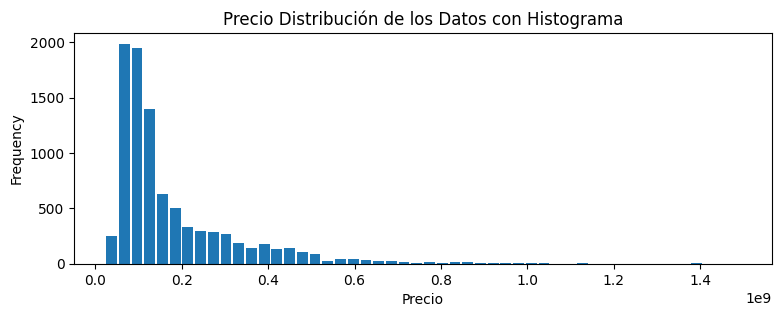

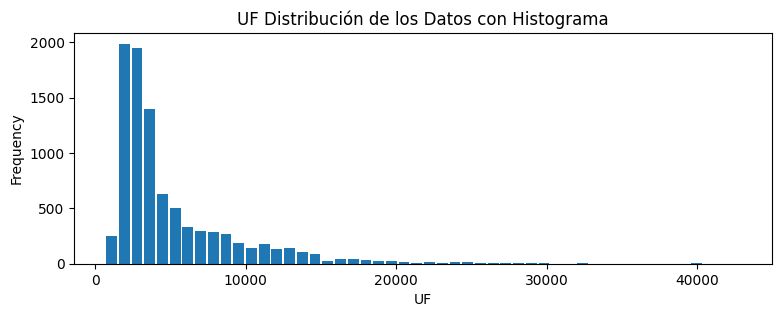

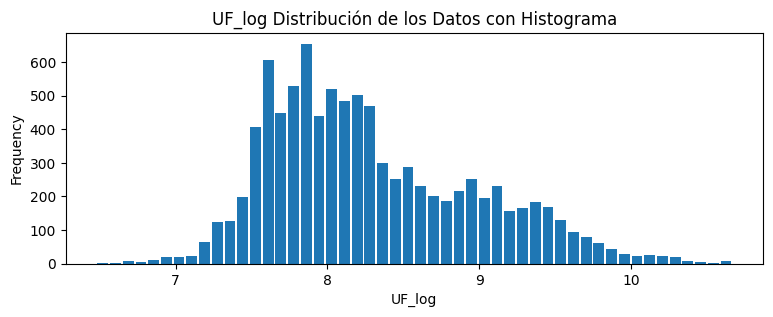

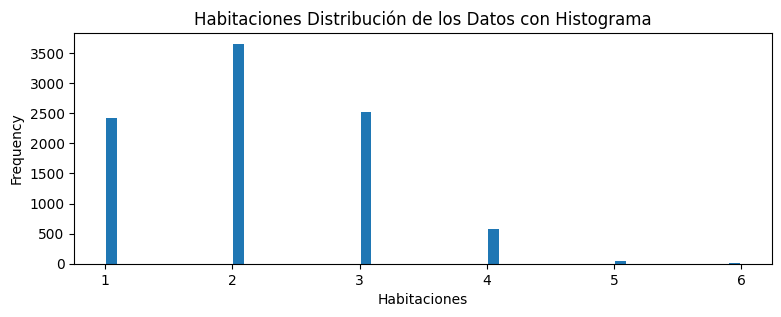

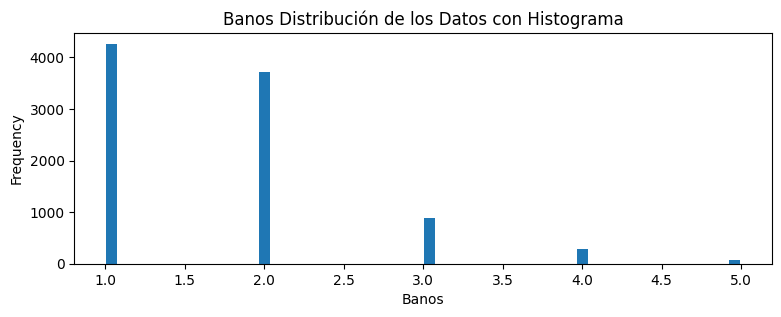

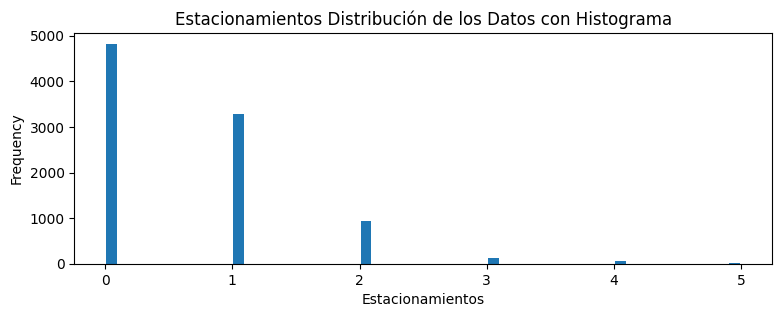

In [235]:
numero_variable =['Precio', 'UF','UF_log', 'Habitaciones', 'Banos',
       'Estacionamientos']

for n in numero_variable:
    plot_hist(n)

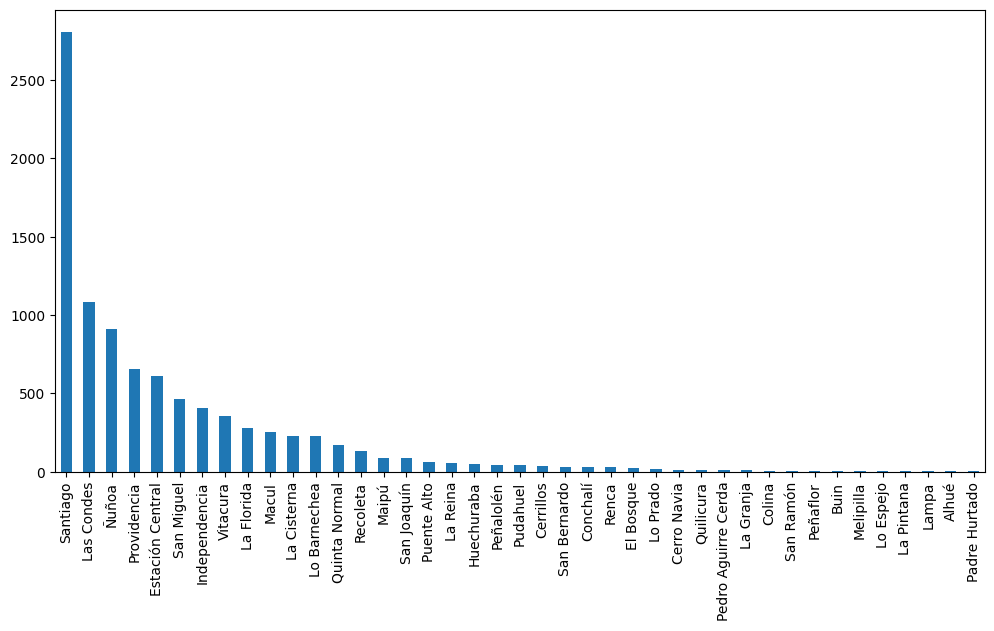

In [236]:
fig, ax = plt.subplots()
grf=piso["Comuna"].value_counts().plot(ax=ax, kind='bar',figsize = (12,6))

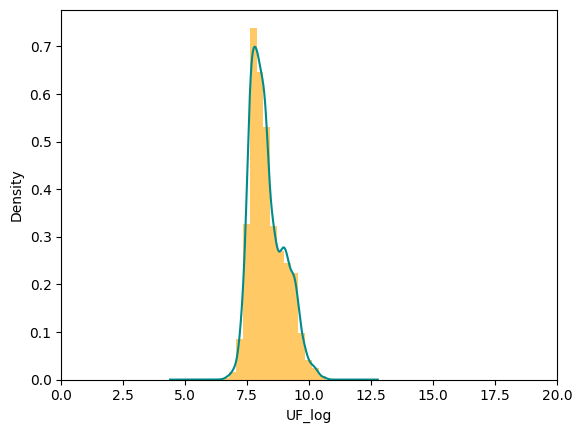

El precio de la  media registrada es:  5147.605939091796

La mediana es: 3445.0

El precio mínima es:  650

El precio máxima es:  42930



In [237]:
ax = piso["UF_log"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
piso["UF_log"].plot(kind='density', color='darkcyan')
ax.set(xlabel='UF_log')
plt.xlim(0,20)
plt.show()

# Precio 
print("El precio de la  media registrada es: ",piso["UF"].mean(skipna=True))
print("")
print("La mediana es:",piso["UF"].median(skipna=True))
print("")
print("El precio mínimo es: ",piso["UF"].min(skipna=True))
print("")
print("El precio máximo es: ",piso["UF"].max(skipna=True))
print("")

C:\Users\diazb\AppData\Local\Temp\ipykernel_11400\2269102346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(piso.corr(), annot=True)


<AxesSubplot: >

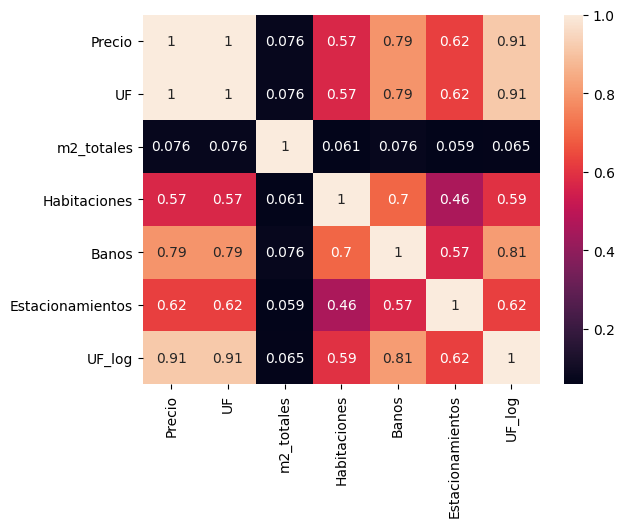

In [238]:
sns.heatmap(piso.corr(), annot=True)

# Union de Dataframe

In [239]:
pd.read_excel("data/numero_pisos.xlsx")

,Comuna,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
0,Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,...,59.57,9.63,10.62,3.37,14405,1279990.0,3.595824,589.23,48.24,85
1,Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,...,40.00,27.42,8.70,2.35,1847,716905.6,0.720013,693.22,9.28,90
2,Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,...,19.00,34.64,12.84,4.48,4872,531362.4,1.571147,510.54,2.75,110
3,Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,...,25.00,29.37,10.44,4.46,4409,540747.9,3.575690,681.45,4.79,80
4,El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,...,32.56,22.65,10.22,2.61,4084,643897.7,10.784120,641.95,4.71,105
5,Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,...,52.94,23.45,11.87,4.20,5574,650501.8,2.424891,672.85,10.19,100
6,Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,...,18.00,28.84,8.08,2.64,2331,607102.0,1.280024,690.32,1.96,90
7,Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,...,18.00,20.91,13.56,4.37,4403,502782.8,2.605929,661.70,7.64,90
8,La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,...,75.00,17.82,6.35,2.13,1800,918453.5,2.244986,707.29,1.98,90
9,La Florida,366376,1375949.93,1159154.11,182,427.54,1.32,107,13,556.75,...,57.58,18.99,5.59,2.12,6098,849390.8,0.000000,810.97,15.28,90


In [240]:
variables=pd.read_excel("data/numero_pisos.xlsx")

In [241]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 39 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      48 non-null     object 
 1   Poblacion total 2020                                                                        48 non-null     int64  
 2   Superficie de Área Verde m²                                                                 48 non-null     float64
 3   Superficie Plazas m²                                                                        48 non-null     float64
 4   Número de establecimientos educacion inicial                                                48 non-null     int64  
 5   Distancia a Educación Inicial (m)            

In [242]:
status(variables).sort_values(by="q_nan",ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Comuna,0,0.0,0,0.000000,48,object
29,Porcentaje de unidades vecinales que tienen e...,0,0.0,1,0.020833,34,float64
22,Total de residuos (t),0,0.0,0,0.000000,48,float64
23,Porcentaje de residuos municipales valorizados,0,0.0,14,0.291667,33,float64
24,Porcentaje de viviendas en mal estado y/o ca...,0,0.0,0,0.000000,48,float64
25,Porcentaje de participación del FCM en el Ingr...,0,0.0,0,0.000000,48,float64
26,Víctimas Robo con violencia o Intimidación,0,0.0,0,0.000000,48,int64
27,Víctimas Robo por Sorpresa,0,0.0,0,0.000000,47,int64
28,Número de denuncias por delito en el espacio ...,0,0.0,0,0.000000,39,float64
30,Porcentaje de la población en situación de po...,0,0.0,0,0.000000,48,float64


## Cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables

In [243]:
piso = piso[['Comuna','m2_totales', 'Habitaciones', 'Banos',
       'Estacionamientos', 'Publi','Precio', 'UF',"UF_log"]] 
       # cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables

In [244]:
piso.columns

Index(['Comuna', 'm2_totales', 'Habitaciones', 'Banos', 'Estacionamientos',
       'Publi', 'Precio', 'UF', 'UF_log'],
      dtype='object')

In [245]:
piso["Comuna"].unique().shape

(41,)

## Pasamos la columna comuna a indice para facilitar la union con el dataframe principal pisos

In [246]:
variables.set_index("Comuna",inplace=True)

In [247]:
variables

,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),Número de establecimientos atencion primaria,...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
Comuna,,,,,,,,,,,,,,,,,,,,,
Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,7,...,59.57,9.63,10.62,3.37,14405,1279990.0,3.595824,589.23,48.24,85
Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,4,...,40.00,27.42,8.70,2.35,1847,716905.6,0.720013,693.22,9.28,90
Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,8,...,19.00,34.64,12.84,4.48,4872,531362.4,1.571147,510.54,2.75,110
Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,9,...,25.00,29.37,10.44,4.46,4409,540747.9,3.575690,681.45,4.79,80
El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,10,...,32.56,22.65,10.22,2.61,4084,643897.7,10.784120,641.95,4.71,105
Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,6,...,52.94,23.45,11.87,4.20,5574,650501.8,2.424891,672.85,10.19,100
Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,5,...,18.00,28.84,8.08,2.64,2331,607102.0,1.280024,690.32,1.96,90
Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,4,...,18.00,20.91,13.56,4.37,4403,502782.8,2.605929,661.70,7.64,90
La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,4,...,75.00,17.82,6.35,2.13,1800,918453.5,2.244986,707.29,1.98,90


# Unimos nuestras bases datos

In [248]:
union= piso.join(variables, on=["Comuna"], how= "inner")
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9226 entries, 0 to 7726
Data columns (total 47 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      9226 non-null   object 
 1   m2_totales                                                                                  9226 non-null   int64  
 2   Habitaciones                                                                                9226 non-null   int64  
 3   Banos                                                                                       9226 non-null   int64  
 4   Estacionamientos                                                                            9226 non-null   int64  
 5   Publi                                    

In [249]:
piso["Comuna"].unique().shape

(41,)

In [250]:
union["Comuna"].unique().shape

(40,)

In [251]:
union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_11400\2198893341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  union.corr()


,m2_totales,Habitaciones,Banos,Estacionamientos,Precio,UF,UF_log,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
m2_totales,1.000000,0.061052,0.075807,0.058801,0.075807,0.075807,0.065394,-0.028382,0.005874,0.001345,...,-0.042707,-0.001066,-0.032305,-0.031810,-0.034046,0.025111,-0.028713,0.030537,-0.019484,-0.017728
Habitaciones,0.061052,1.000000,0.697255,0.456310,0.569198,0.569192,0.593268,-0.167485,0.036240,0.194426,...,-0.373796,-0.135339,-0.390546,-0.377779,-0.343739,0.288129,-0.318982,0.369266,-0.131876,-0.119214
Banos,0.075807,0.697255,1.000000,0.569533,0.791984,0.791984,0.811012,-0.130500,0.152448,0.159431,...,-0.423147,-0.358309,-0.504792,-0.494639,-0.325246,0.511963,-0.359583,0.427884,-0.005236,-0.297951
Estacionamientos,0.058801,0.456310,0.569533,1.000000,0.622954,0.622954,0.624476,-0.154238,0.076891,0.172178,...,-0.399589,-0.262748,-0.460630,-0.453750,-0.343176,0.422537,-0.355037,0.421518,-0.070747,-0.204172
Precio,0.075807,0.569198,0.791984,0.622954,1.000000,1.000000,0.914363,-0.190063,0.161560,0.158568,...,-0.558949,-0.448290,-0.614694,-0.599098,-0.415554,0.646471,-0.423920,0.524290,-0.006604,-0.383390
UF,0.075807,0.569192,0.791984,0.622954,1.000000,1.000000,0.914367,-0.190064,0.161557,0.158562,...,-0.558948,-0.448294,-0.614695,-0.599098,-0.415554,0.646474,-0.423921,0.524291,-0.006602,-0.383395
UF_log,0.065394,0.593268,0.811012,0.624476,0.914363,0.914367,1.000000,-0.185952,0.179568,0.143477,...,-0.599036,-0.569557,-0.720844,-0.703275,-0.451788,0.749762,-0.498934,0.583320,0.047442,-0.517062
Poblacion total 2020,-0.028382,-0.167485,-0.130500,-0.154238,-0.190063,-0.190064,-0.185952,1.000000,0.632207,0.431760,...,0.492133,-0.303153,0.286861,0.161893,0.811709,0.020522,0.430128,-0.394188,0.827844,-0.004890
Superficie de Área Verde m²,0.005874,0.036240,0.152448,0.076891,0.161560,0.161557,0.179568,0.632207,1.000000,0.344188,...,0.148796,-0.432734,0.025784,-0.039843,0.516710,0.244018,0.265476,-0.257736,0.709104,-0.356557
Superficie Plazas m²,0.001345,0.194426,0.159431,0.172178,0.158568,0.158562,0.143477,0.431760,0.344188,1.000000,...,-0.092847,-0.022327,-0.277669,-0.338451,-0.058588,0.089377,-0.305201,0.376461,0.110973,0.210278


In [252]:
correlacion= union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_11400\2971588364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion= union.corr()


In [253]:
correlacion["UF"].sort_values(ascending=False)

UF                                                                                            1.000000
Precio                                                                                        1.000000
UF_log                                                                                        0.914367
Banos                                                                                         0.791984
Distancia a Educación Inicial (m)                                                             0.698806
Distancia a Centro de Salud (m)                                                               0.684858
Distancia a Educación Basica (m)                                                              0.670419
 Consumo Per Capita residencial (Kwh/persona)                                                 0.658214
Ingreso promedio del hogar por Comuna                                                         0.646474
Estacionamientos                                                         

# Utilizaremos como target UF_log

In [254]:
# veamos la correlacion entre las variables 

In [255]:
union.columns

Index(['Comuna', 'm2_totales', 'Habitaciones', 'Banos', 'Estacionamientos',
       'Publi', 'Precio', 'UF', 'UF_log', 'Poblacion total 2020',
       'Superficie de Área Verde m²', 'Superficie Plazas m²',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)', '% fonasa (Prevision Salud)',
       '% ff.aa. y del orden (Prevision Salud)', '% isapre (Prevision Salud)',
       ' % ninguno (Prevision Salud)', '% otro sistema (Prevision Salud)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suminist

In [256]:
cols_to_plot1= ['UF_log',
       'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²',' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',]

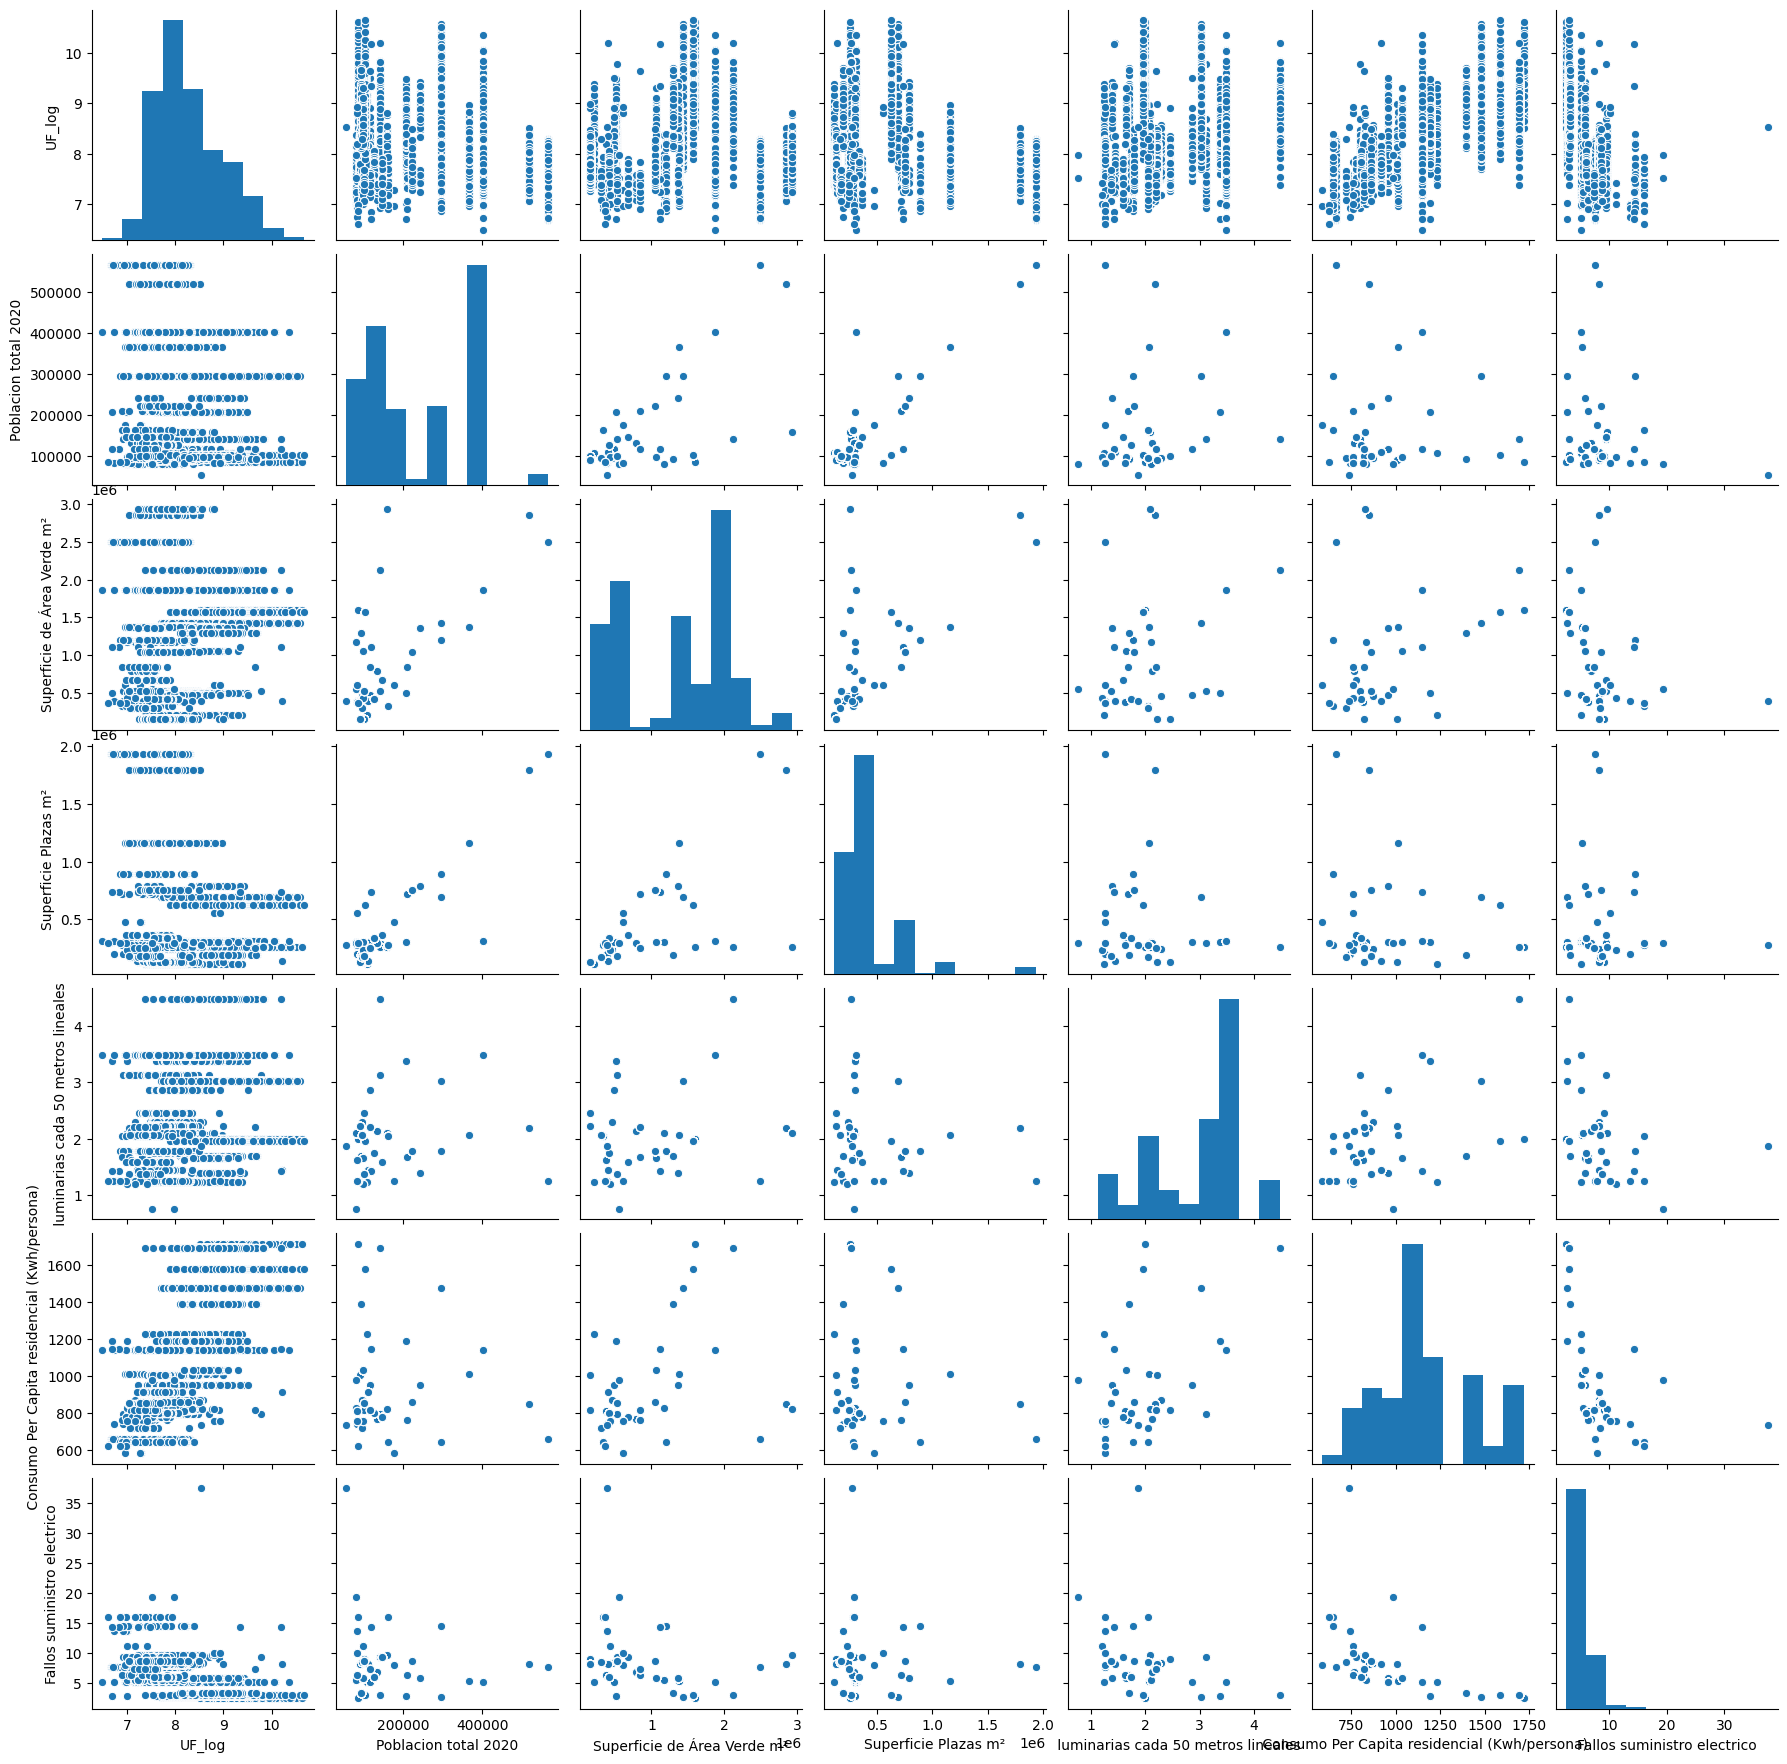

In [257]:
sns.pairplot(union[cols_to_plot1])

<AxesSubplot: >

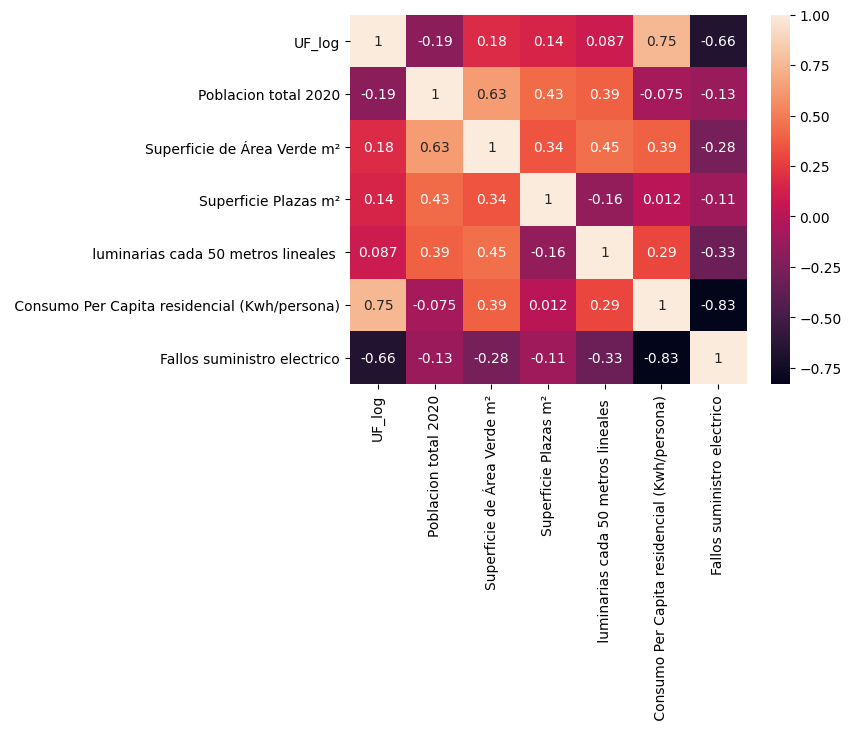

In [258]:
sns.heatmap(union[cols_to_plot1].corr(), annot=True)

In [259]:
# Educacion
cols_to_plot2= ['UF_log',
      
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
      ]

In [ ]:
#'Número de establecimientos educacion inicial',

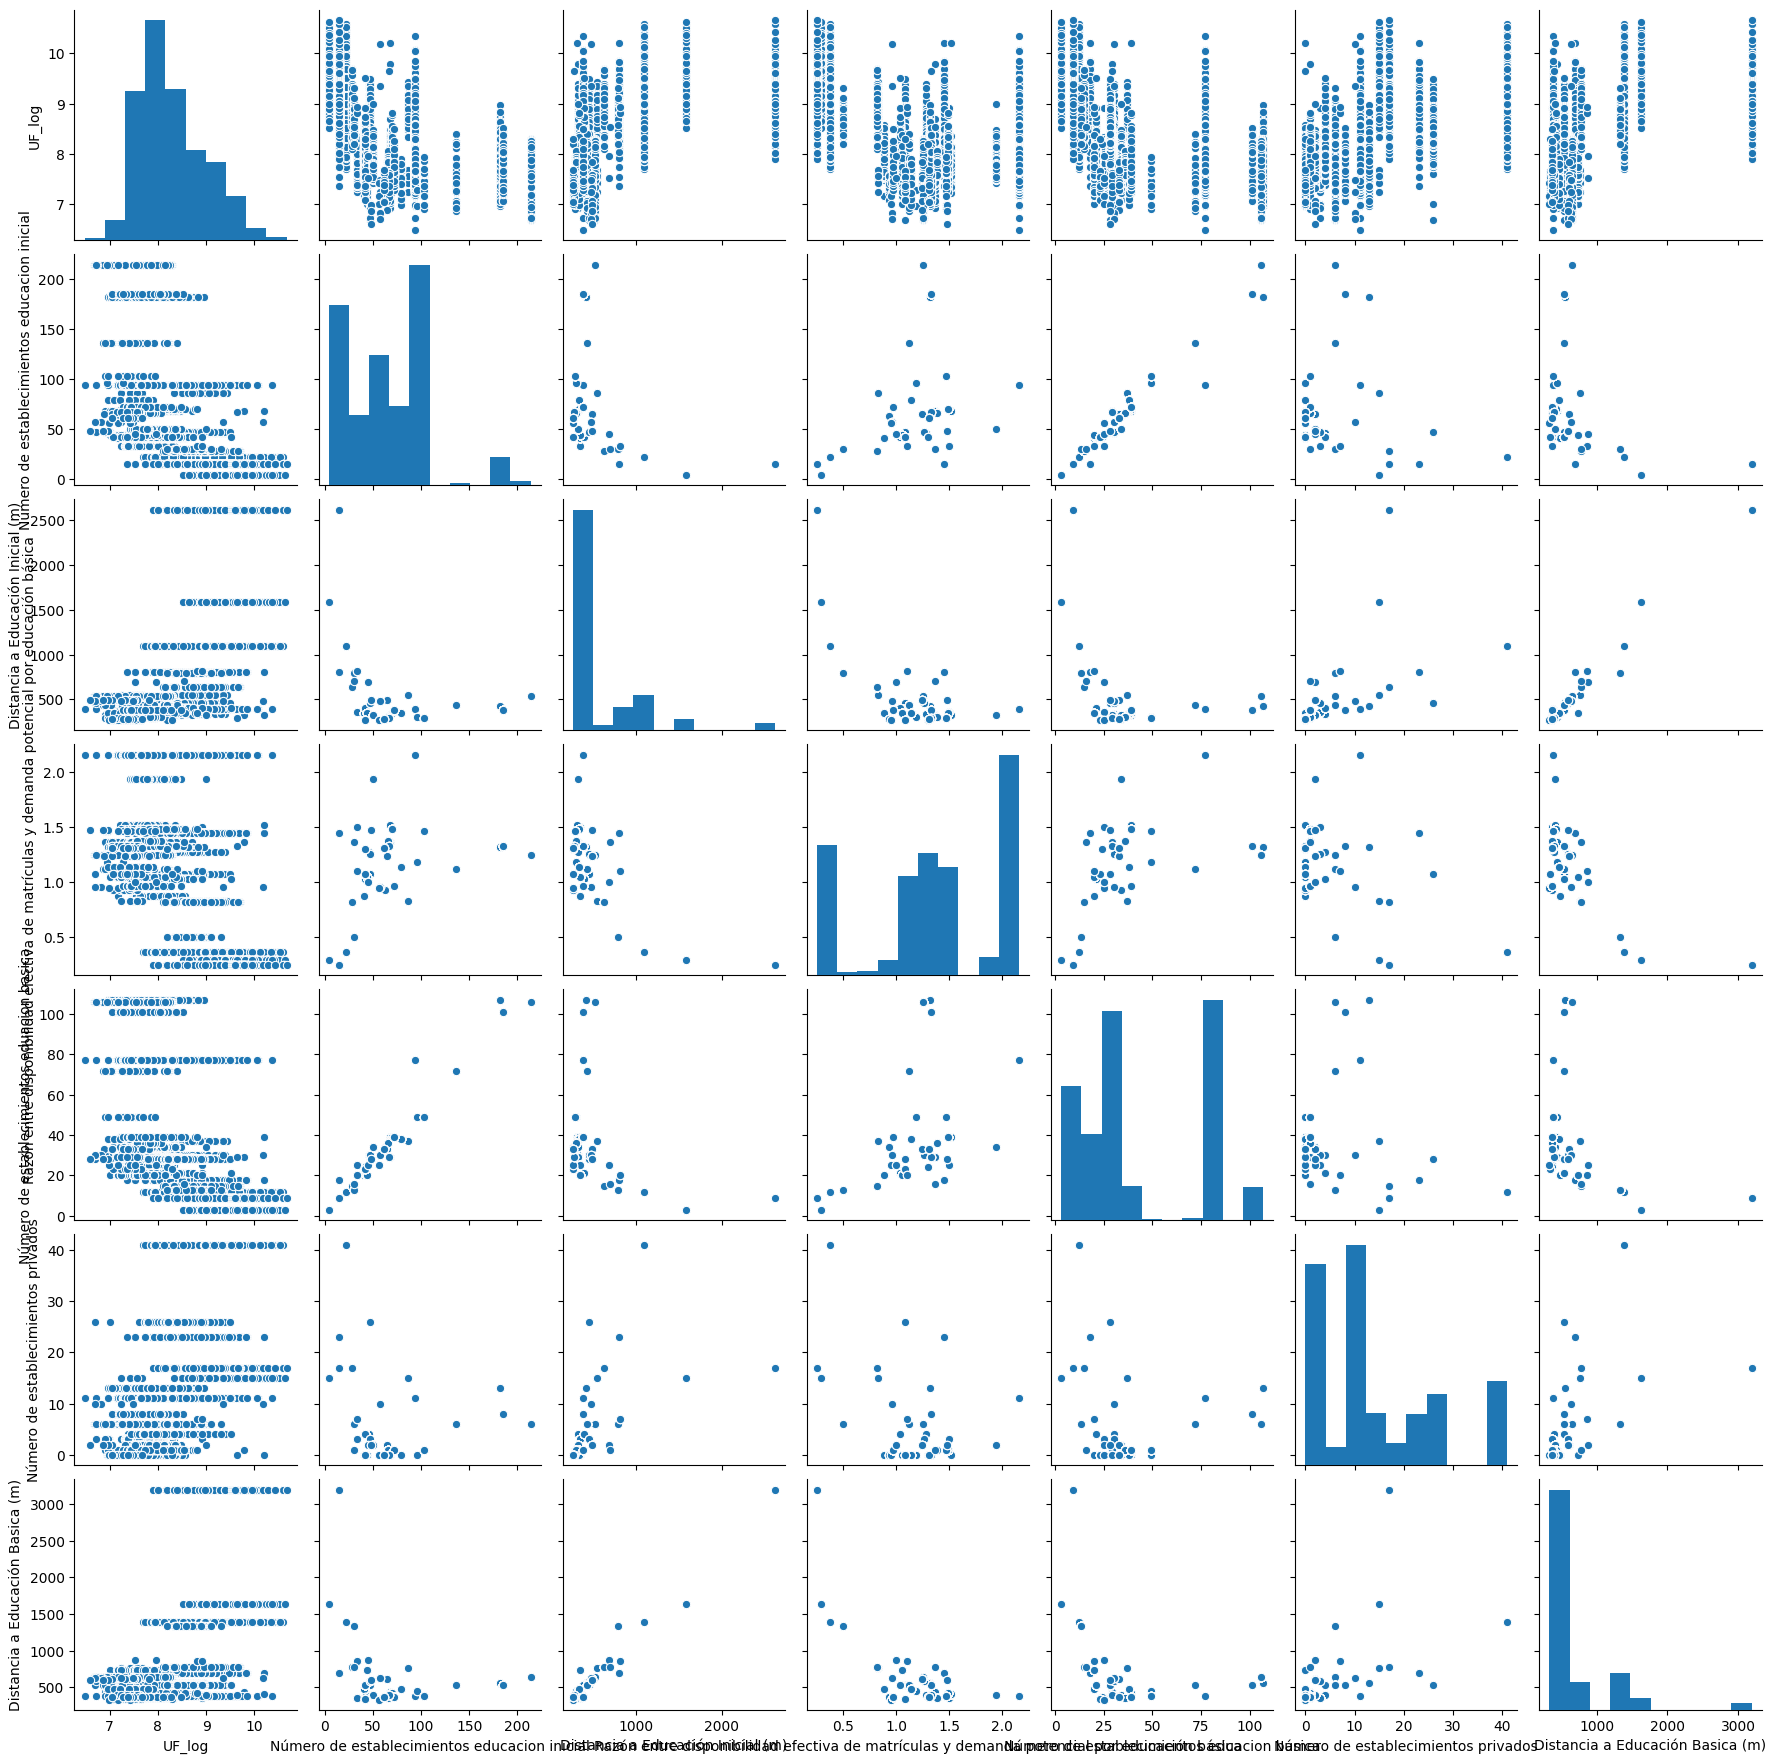

In [260]:
sns.pairplot(union[cols_to_plot2])

<AxesSubplot: >

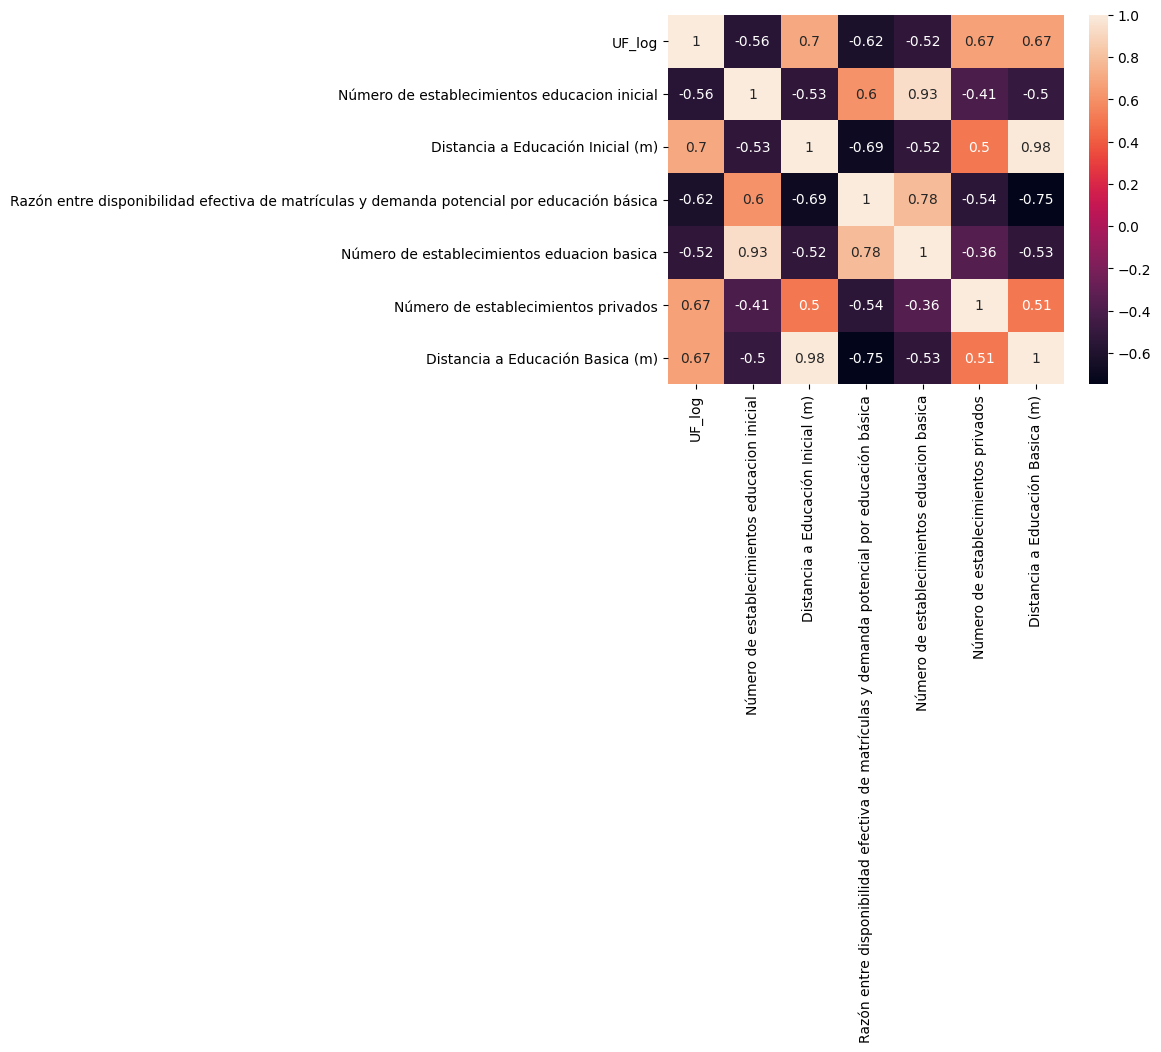

In [261]:
sns.heatmap(union[cols_to_plot2].corr(), annot=True)# podriamos eliminar numero de establecimiento de educacion inicial, distancia de eduacion basica

In [262]:
cols_to_plot3=["UF_log",'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)','% fonasa (Prevision Salud)',
       '% ff.aa. y del orden (Prevision Salud)', '% isapre (Prevision Salud)',
       ' % ninguno (Prevision Salud)', '% otro sistema (Prevision Salud)',
]

<AxesSubplot: >

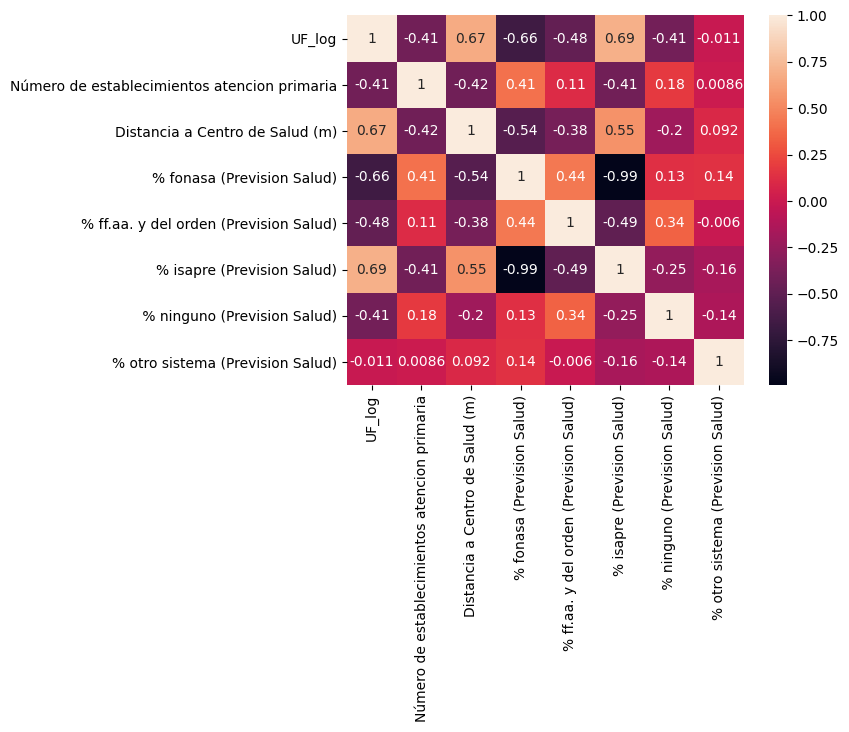

In [263]:
sns.heatmap(union[cols_to_plot3].corr(), annot=True)# habria que barajar si quitar la columna de Fonasa

In [264]:
#infraestructura y servicios 
cols_to_plot4=["UF_log",'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcentaje de viviendas en mal estado  y/o carente  servicios básicos',
       'Porcentaje de participación del FCM en el Ingreso Municipal Total',
       'Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares',
       'Longitud ciclovías (km)', 'Tiempo de viaje en trans publico hr punta','% de Acceso deficitario a Servicios Basicos ',]

<AxesSubplot: >

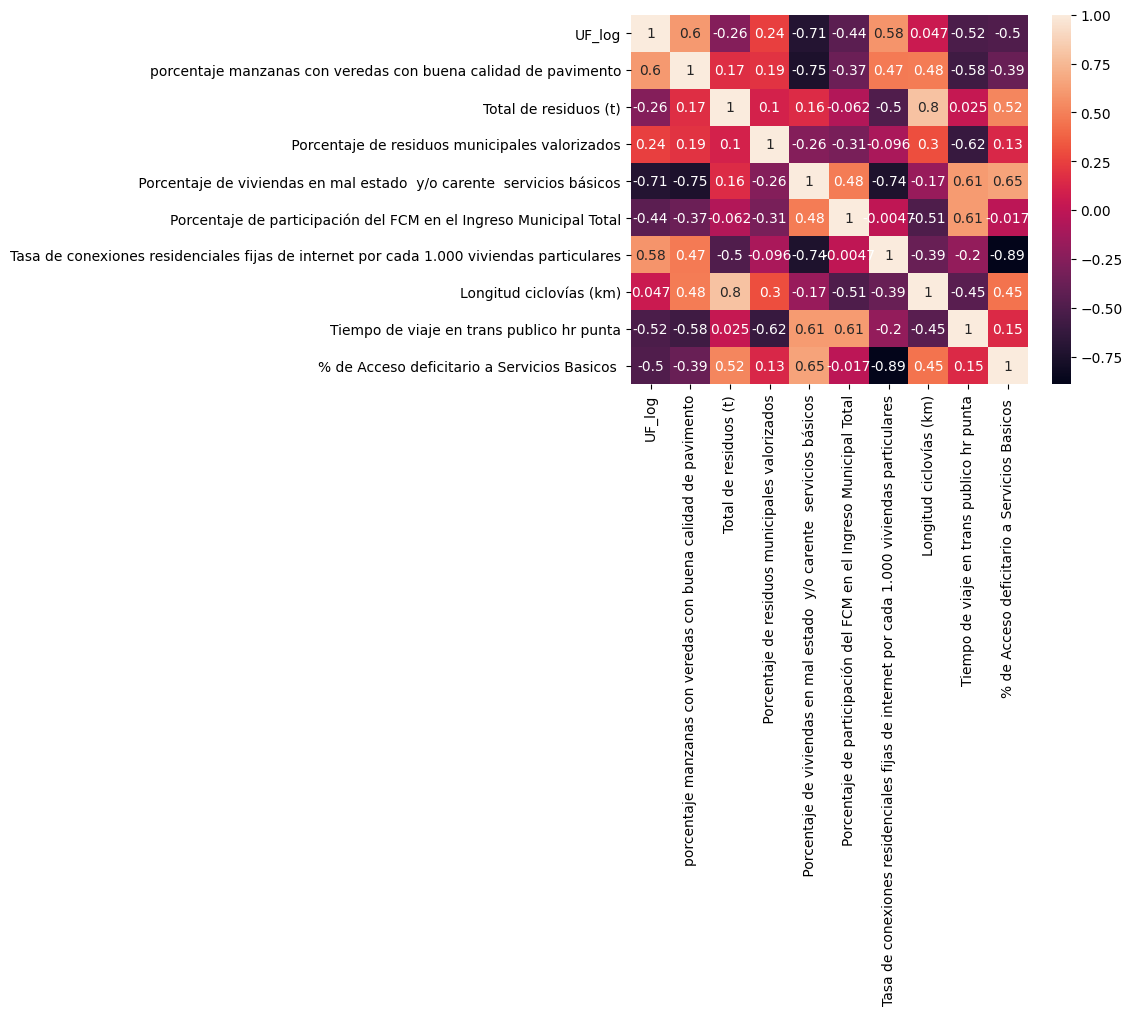

In [265]:
sns.heatmap(union[cols_to_plot4].corr(), annot=True)

In [266]:
cols_to_plot5 = ["UF_log",'Víctimas Robo con violencia o Intimidación',
       'Víctimas Robo por Sorpresa',
       ' Número de denuncias por delito en el espacio público cada 100 habitantes',
       ' Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables',
       ' Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF)',
       'Porcentaje de Hacinamiento',
       'Porcentaje de viviendas con situación de allegamiento externo',
       ' Requerimiento de viviendas nuevas urbanas','Ingreso promedio del hogar por Comuna',]

<AxesSubplot: >

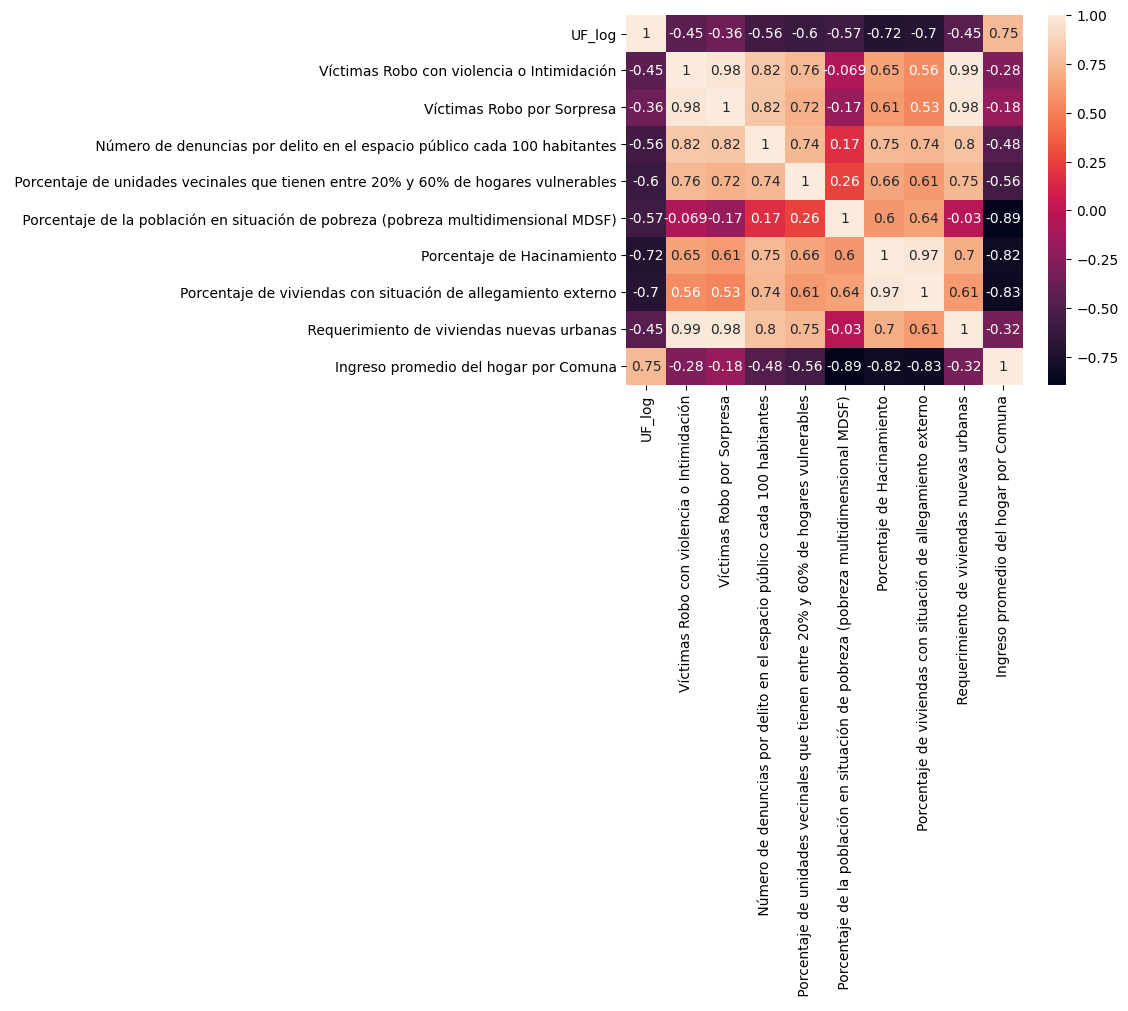

In [267]:
sns.heatmap(union[cols_to_plot5].corr(), annot=True)# podriamos eliminar el indice de robo por sorpresa y 'Porcentaje de viviendas con situación de allegamiento externo'

## transformamos cada comuna en una variable 

In [268]:
dummis_comunas= pd.get_dummies(union["Comuna"])
dummis_comunas.head()

,Buin,Cerrillos,Cerro Navia,Colina,Conchalí,El Bosque,Estación Central,Huechuraba,Independencia,La Cisterna,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Unimos los dos dataframe

In [269]:

pd.concat([union,dummis_comunas],axis=1)

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,UF_log,Poblacion total 2020,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,7.955425,107828,...,0,0,0,0,0,1,0,0,0,0
15,San Miguel,48,2,1,1,16/12/2022,100000000,2871,7.962764,107828,...,0,0,0,0,0,1,0,0,0,0
32,San Miguel,36,1,1,1,12/12/2022,88798650,2550,7.844241,107828,...,0,0,0,0,0,1,0,0,0,0
47,San Miguel,50,3,1,1,06/12/2022,73824760,2120,7.659643,107828,...,0,0,0,0,0,1,0,0,0,0
98,San Miguel,59,2,1,1,06/11/2022,107603070,3090,8.036250,107828,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,Melipilla,42,2,1,1,08/12/2022,25500000,732,6.597146,84286,...,0,0,0,0,0,0,0,0,0,0
2764,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
3561,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
4395,Buin,110,3,3,1,13/12/2022,261172500,7500,8.922792,82267,...,0,0,0,0,0,0,0,0,0,0


In [270]:
pisos=pd.concat([union,dummis_comunas],axis=1)
pisos

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,UF_log,Poblacion total 2020,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,7.955425,107828,...,0,0,0,0,0,1,0,0,0,0
15,San Miguel,48,2,1,1,16/12/2022,100000000,2871,7.962764,107828,...,0,0,0,0,0,1,0,0,0,0
32,San Miguel,36,1,1,1,12/12/2022,88798650,2550,7.844241,107828,...,0,0,0,0,0,1,0,0,0,0
47,San Miguel,50,3,1,1,06/12/2022,73824760,2120,7.659643,107828,...,0,0,0,0,0,1,0,0,0,0
98,San Miguel,59,2,1,1,06/11/2022,107603070,3090,8.036250,107828,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,Melipilla,42,2,1,1,08/12/2022,25500000,732,6.597146,84286,...,0,0,0,0,0,0,0,0,0,0
2764,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
3561,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
4395,Buin,110,3,3,1,13/12/2022,261172500,7500,8.922792,82267,...,0,0,0,0,0,0,0,0,0,0


## Debemos cambiar uint8  a int de cada una de las nuevas columnas, que son las comunas

In [272]:
le=LabelEncoder()


for i in pisos.select_dtypes("uint8").keys(): # hemos cambiado  uint8  a int de cada una de las nuevas columnas, que son las comunas
    pisos[i]=le.fit_transform(pisos[i])

In [274]:
pisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9226 entries, 0 to 7726
Data columns (total 87 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      9226 non-null   object 
 1   m2_totales                                                                                  9226 non-null   int64  
 2   Habitaciones                                                                                9226 non-null   int64  
 3   Banos                                                                                       9226 non-null   int64  
 4   Estacionamientos                                                                            9226 non-null   int64  
 5   Publi                                    

In [275]:
#pisos.to_excel("data/pisos_analis_data.xlsx", index = False)